## Import Library

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import RANSACRegressor, LinearRegression, Ridge, Lasso
from statsmodels.api import OLS, add_constant
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Import Dataset

In [309]:
path = 'C:/Users/julia/Desktop/Yanjun/Python/Data/final_data.csv6'
car = pd.read_csv(path)
car

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl,price
0,-0.844782,0.074449,-1.690772,-0.546059,0.519071,0.537874,1.086670,-1.188177,-0.689072,0.412947
1,-0.844782,0.074449,-1.690772,-0.546059,0.519071,0.537874,1.086670,-1.188177,-0.689072,0.413187
2,-0.190566,0.604046,-0.708596,-0.691627,-2.404880,-1.859172,1.086670,-1.188177,-0.689072,0.413187
3,0.136542,-0.431076,0.173698,-0.109354,-0.517266,0.537874,1.086670,0.841625,-0.689072,0.412989
4,0.230001,0.218885,0.107110,-1.273900,-0.517266,-1.859172,1.086670,-1.188177,-0.689072,0.413249
...,...,...,...,...,...,...,...,...,...,...
200,1.398245,0.339248,1.721873,-0.400490,1.666445,0.537874,1.086670,-1.188177,-0.689072,0.413210
201,1.351515,0.339248,1.721873,-0.837195,1.666445,0.537874,1.086670,-1.188177,-0.689072,0.413341
202,1.398245,1.109571,1.721873,-1.128332,0.926204,-1.859172,1.086670,-1.188177,-0.689072,0.413460
203,1.398245,0.435538,1.721873,-0.546059,-1.183483,-1.859172,-0.920243,-1.188177,-0.689072,0.413502


## Split X and y

In [310]:
cond = car.columns == 'price'
features = car.columns[~cond]
X = car[features]
y = car['price']

## Split train and test

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## RANSAC

In [312]:
# X = add_constant(X)

In [313]:
# result = OLS(y,X).fit()
# result.summary()

## Ridge (L2)

In [314]:
# fit the model
ridge = Ridge(alpha = 1)
ridge.fit(X = X_train, y = y_train)
cofficient = ridge.coef_
features = ridge.feature_names_in_
cofficient

array([ 9.27832624e-05,  6.00820385e-05,  3.74840240e-05, -9.73712511e-05,
        1.34612723e-04, -1.56471701e-04,  5.81104281e-05, -6.11105781e-05,
       -1.28375373e-04])

In [297]:
intercept = ridge.intercept_
intercept

0.4126463175817539

In [298]:
ridge.score(X = X_train, y = y_train)

0.8325889467153522

In [299]:
# print the regression equation 
equation_list = [features[i] + ' * (' + '{:0.5f}'.format(cofficient[i]) + ' )' + '\n' for i in range(len(cofficient))]
equation =  ' + '.join(equation_list)
equation = equation +' + ' + '{:.5f}'.format(intercept)
print(equation)

carwidth * (0.00019 )
 + enginesize * (0.00014 )
 + wheelbase * (-0.00001 )
 + highwaympg * (-0.00009 )
 + boreratio * (0.00004 )
 + cylindernumber_four * (-0.00009 )
 + fuelsystem_mpfi * (0.00003 )
 + drivewheel_fwd * (-0.00010 )
 + fuelsystem_2bbl * (-0.00013 )
 + 0.41265


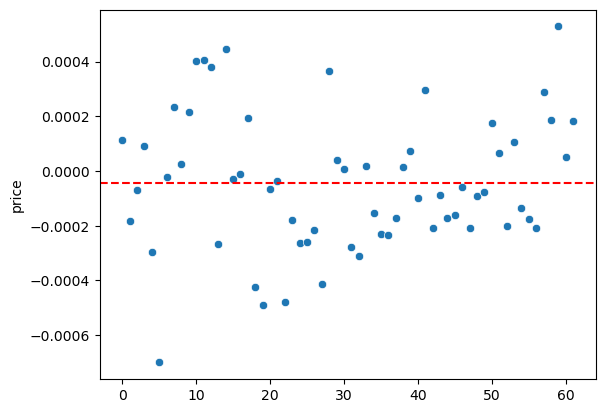

In [300]:
# check the predict
y_predict = ridge.predict(X = X_test)

# check the error 
error_ridge = y_test -  y_predict

# plot the error vs data
sns.scatterplot(x = range(len(X_test)), y = error_ridge, )
plt.axhline(y = error_ridge.mean(), linestyle = '--', color = 'red')
plt.show()
 

In [301]:
# check the r_2 
r2 = r2_score(y_test, y_predict)
r2

0.8772124301807886

## LASSO(L1)

In [302]:
lasso = Lasso(alpha = 0.0003 )
lasso.fit(X = X_train, y = y_train)

Lasso(alpha=0.0003)

In [303]:
cofficient = lasso.coef_
features = lasso.feature_names_in_
cofficient

array([ 8.53482702e-05,  3.37620750e-06,  0.00000000e+00, -1.35359317e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -5.37350876e-06])

In [304]:
intercept = lasso.intercept_

In [305]:
equation_list = [features[i] + ' * (' + '{:0.5f}'.format(cofficient[i]) + ' )' + '\n' for i in range(len(cofficient))]
equation =  ' + '.join(equation_list)
equation = equation +' + ' + '{:.5f}'.format(intercept)
print(equation)

carwidth * (0.00009 )
 + enginesize * (0.00000 )
 + wheelbase * (0.00000 )
 + highwaympg * (-0.00014 )
 + boreratio * (0.00000 )
 + cylindernumber_four * (-0.00000 )
 + fuelsystem_mpfi * (0.00000 )
 + drivewheel_fwd * (-0.00000 )
 + fuelsystem_2bbl * (-0.00001 )
 + 0.41261


In [306]:
lasso.score(X = X_train, y = y_train)

0.43402537226086735

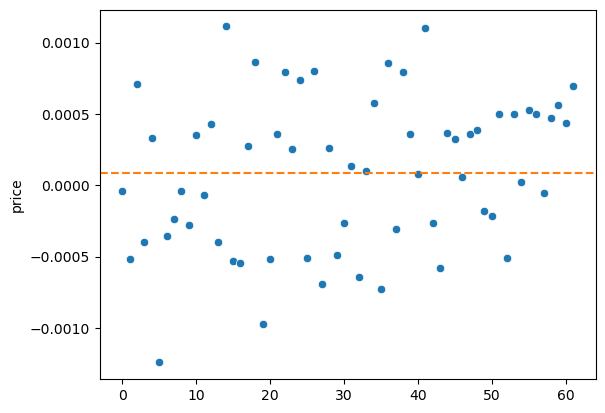

0.43758825665580237

In [307]:
# prdict the result 
y_predict = lasso.predict(X = X_test)

# calculate teh error 
lasso_error = y_test - y_predict

# plot of error vs data
sns.scatterplot(x = range(len(X_test)), y = lasso_error)
plt.axhline(y = lasso_error.mean(), linestyle = '--', color = 'C1' )
plt.show()
r2 = r2_score(y_test, y_predict)
r2

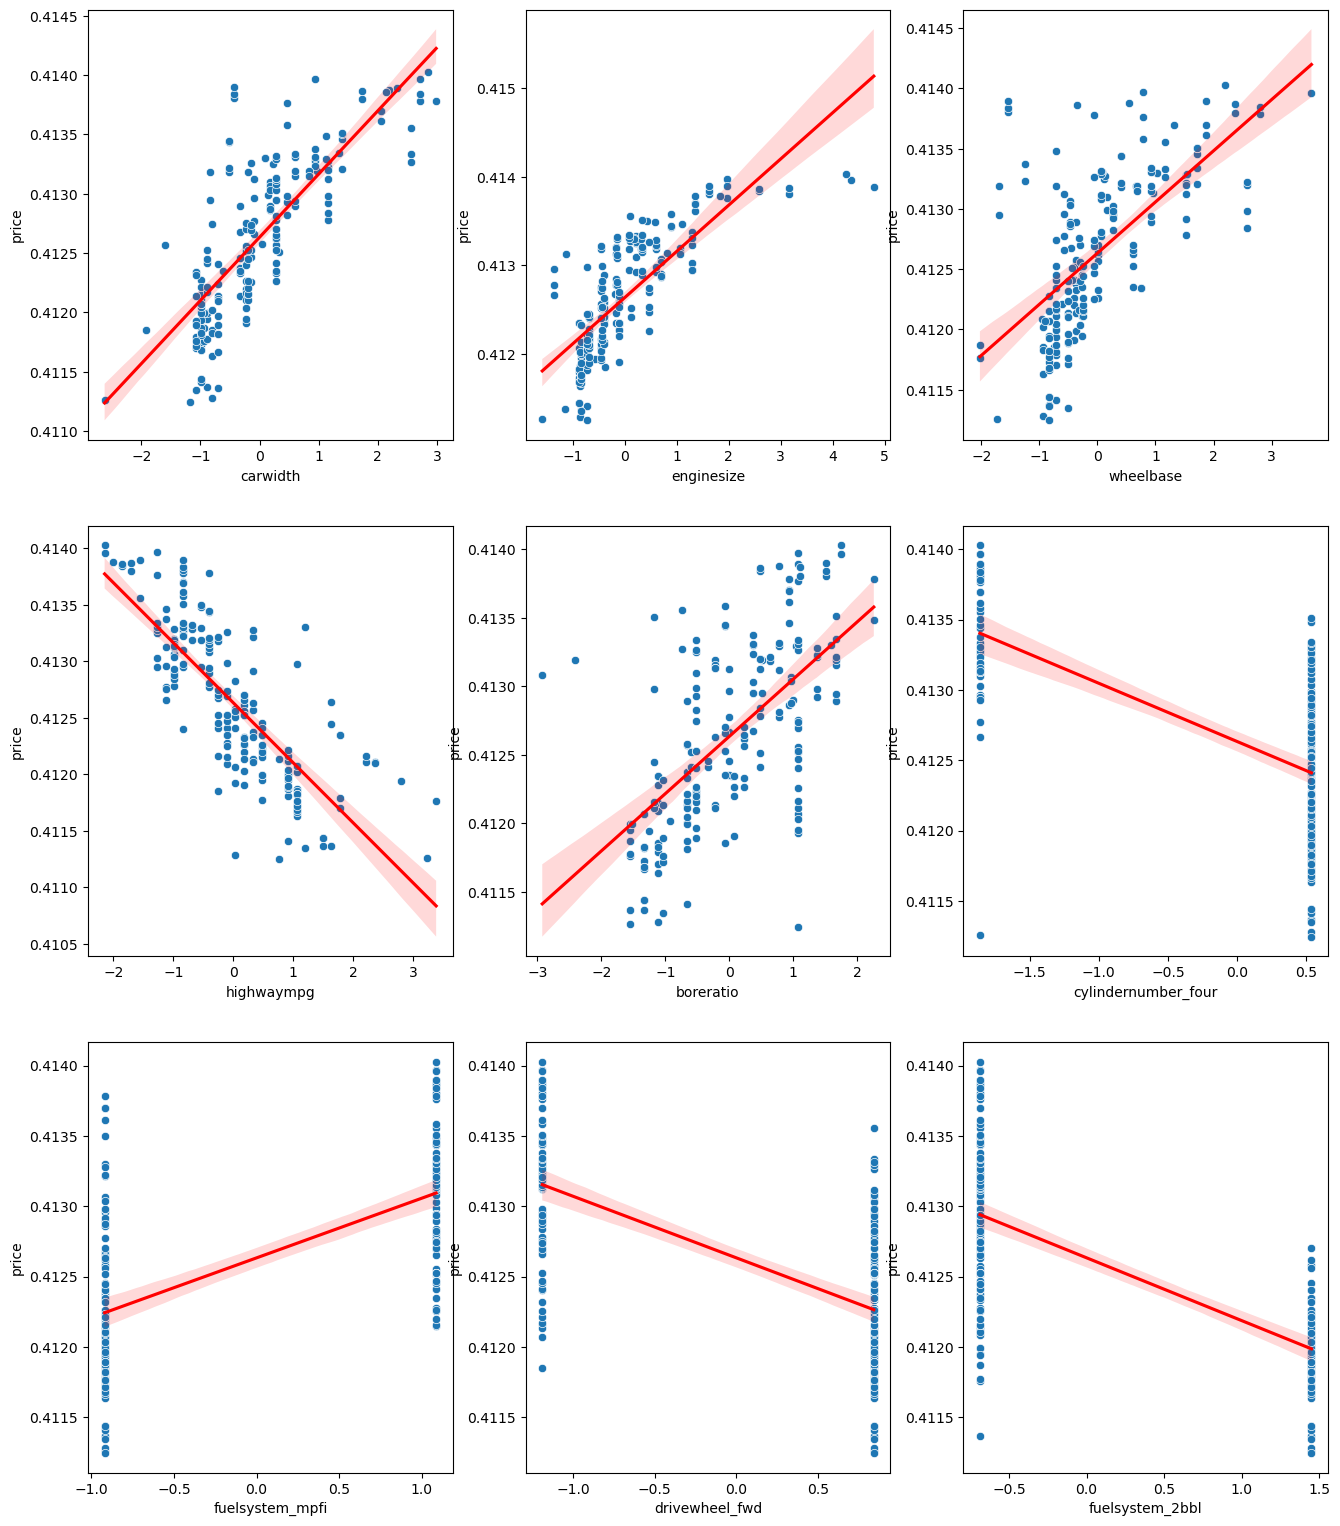

In [329]:
# show the lasso regression plot
fig,axes = plt.subplots(nrows = 3, ncols = 3, figsize = (16,19))
axes = np.ravel(axes)
for j,i in enumerate(car.columns[0:-1]):
  sns.scatterplot(data = car, x = i, y = 'price' ,ax = axes[j] )
  sns.regplot(data = car, x= i, y = 'price', marker = '',color = 'red', ax = axes[j])
plt.show()

## Polynomial regression

In [330]:
# first transform X to square and then use liner regression

poly = PolynomialFeatures(2)    ## transfrom all X to square or the product of two features

X_train_2degree = poly.fit_transform(X= X_train)

lr = LinearRegression()
# fit the model
lr.fit(X = X_train_2degree, y = y_train)

LinearRegression()

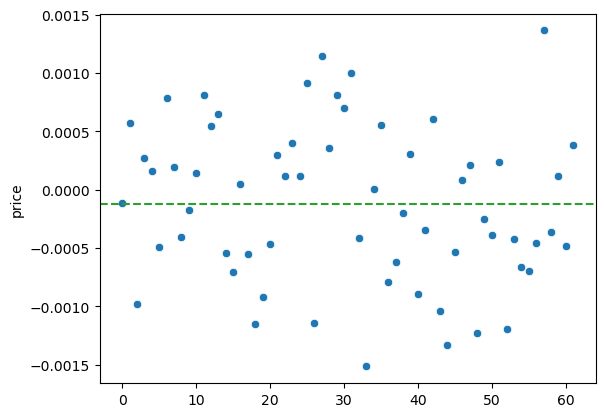

In [331]:
# prdict the result
X_test_2degree = poly.transform(X = X_test)
y_prdict = lr.predict(X = X_test_2degree)

polynomial_error = y_test - y_predict

# plot the error 
sns.scatterplot(x = range(len(X_test)), y = polynomial_error)
plt.axhline(y = polynomial_error.mean(),linestyle = '--', color = 'C2')
plt.show()

In [332]:
X_test_2degree = X_test_2degree.round(5)
X_test_2degree

array([[ 1.     , -0.33076, -0.16628, ...,  0.70833,  1.22139,  2.10606],
       [ 1.     , -0.09711, -1.12918, ...,  1.41176,  0.81874,  0.47482],
       [ 1.     , -1.07843, -0.45515, ...,  0.70833,  1.22139,  2.10606],
       ...,
       [ 1.     ,  1.1646 , -0.16628, ...,  1.41176,  0.81874,  0.47482],
       [ 1.     , -0.70459, -0.69587, ...,  0.70833,  1.22139,  2.10606],
       [ 1.     ,  0.97768,  0.31517, ...,  1.41176,  0.81874,  0.47482]])

In [333]:
X_test

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl
100,-0.330755,-0.166277,-0.259126,0.472920,0.000903,0.537874,-0.920243,0.841625,1.451227
58,-0.097107,-1.129181,-0.575419,-1.128332,0.000903,-1.859172,1.086670,-1.188177,-0.689072
139,-1.078431,-0.455148,-0.841772,0.036215,1.074252,0.537874,-0.920243,0.841625,1.451227
176,0.276731,-0.118132,0.606521,0.181783,-0.073121,0.537874,1.086670,0.841625,-0.689072
192,0.463650,-0.719947,0.273580,1.055193,-1.183483,0.537874,-0.920243,0.841625,-0.689072
...,...,...,...,...,...,...,...,...,...
48,1.725353,3.155742,2.371108,-1.710605,1.111264,-1.859172,1.086670,-1.188177,-0.689072
168,-0.143836,0.459611,-0.059361,-0.109354,1.074252,0.537874,1.086670,-1.188177,-0.689072
109,1.164596,-0.166277,2.570873,-0.982764,0.482059,0.537874,1.086670,-1.188177,-0.689072
161,-0.704593,-0.695874,-0.508831,0.472920,-0.517266,0.537874,-0.920243,0.841625,1.451227


## Plot the polynomial plots

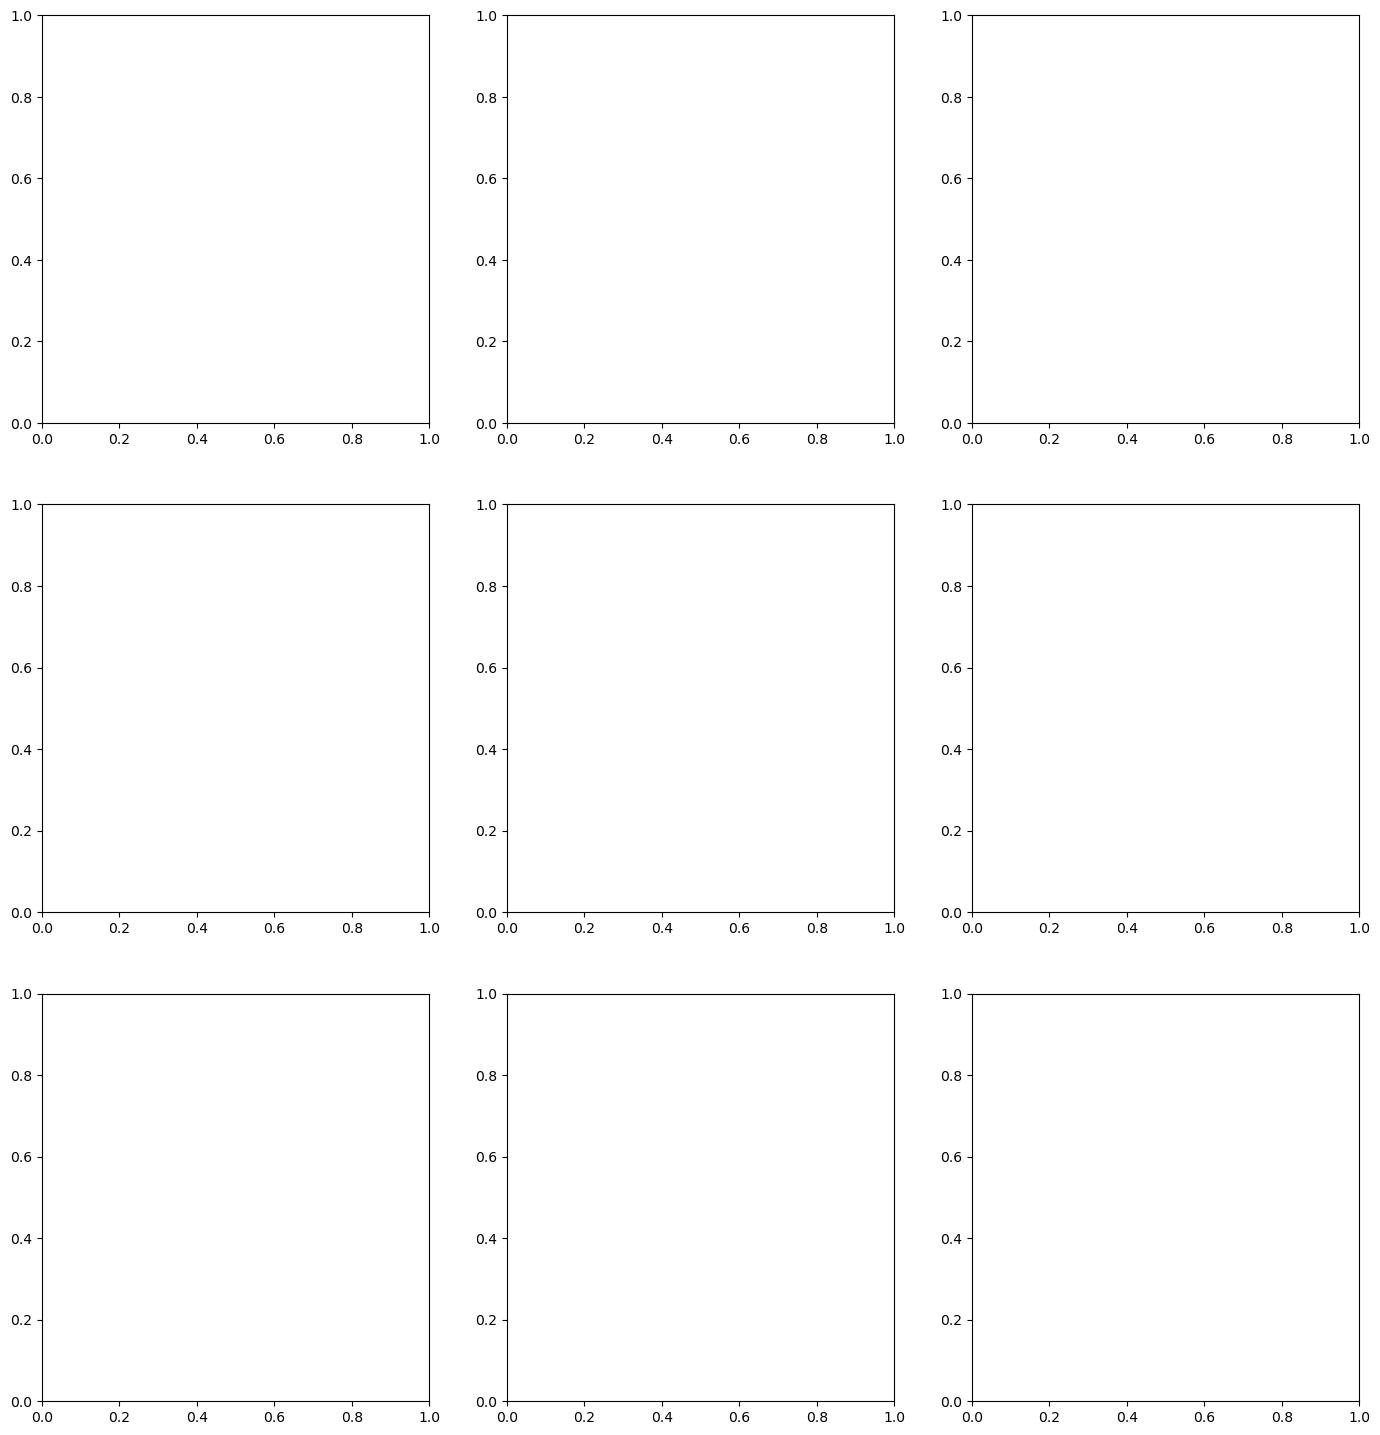

In [336]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17,18))

In [334]:
lr.score(X_test_2degree, y_test)

-8.91004679896285e+22

In [335]:
r2_score(y_test, y_predict)

-0.1046497197140186